<h1>Pochopenie atribútov</h1>

<h4>Naimportovanie knižníc</h4>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from calendar import month_abbr
from scipy.stats import chi2_contingency
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

<h4>Načitanie datasetu</h4>

In [21]:
# Načítanie datasetu
tornado = pd.read_csv("us_tornado_dataset_1950_2021.csv")

<h4>Počet chýbajúcich údajov v stlpcoch "wid" a "len"</h4>

In [22]:
# Vypočítanie počtu hodnôt rovných nule v stĺpci "wid"
pocet_nul_wid = (tornado['wid'] == 0).sum()

# Vypočítanie počtu hodnôt rovných nule v stĺpci "len"
pocet_nul_len = (tornado['len'] == 0).sum()

print("Počet hodnôt rovných nule v stĺpci 'wid':", pocet_nul_wid)
print("Počet hodnôt rovných nule v stĺpci 'len':", pocet_nul_len)

Počet hodnôt rovných nule v stĺpci 'wid': 473
Počet hodnôt rovných nule v stĺpci 'len': 123


<h4>Graf pre početnosti tornád podľa intenzity</h4>

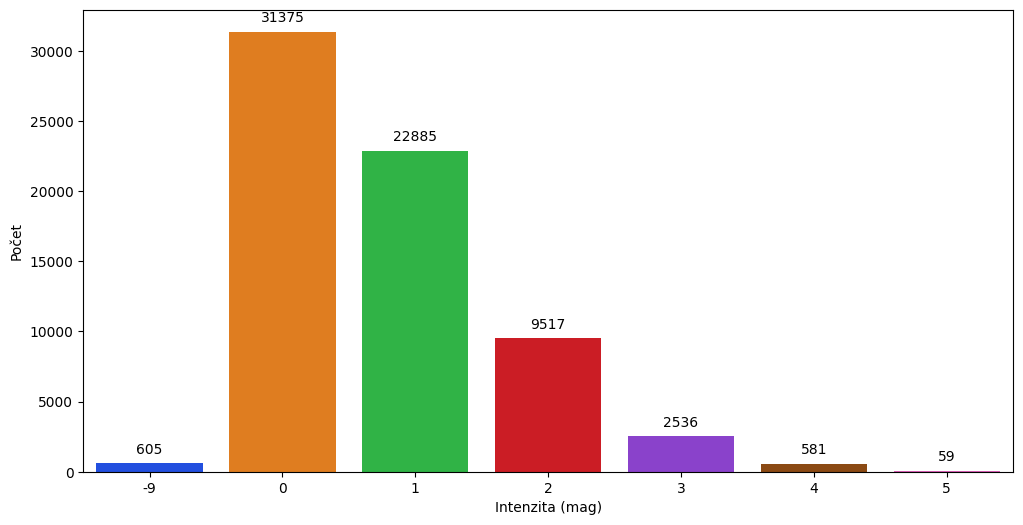

In [23]:
# Vytvorenie grafu pre početnosti tornád podľa intenzity
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='mag', data=tornado, palette='bright', legend=False, hue='mag')

# Pridanie zaokrúhlených hodnôt nad stĺpce
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Intenzita (mag)')
plt.ylabel('Počet')

# Zobrazenie grafu
plt.show()

<h4>Vyjadrenie početnosti v percentách</h4>

In [24]:
#Výpočet percentuálneho podielu 
percentage_by_intensity = tornado.groupby('mag').size() / len(tornado) * 100

# Výpis výsledkov
for intensity, percentage in percentage_by_intensity.items():
    print(f"Percentuálny podiel tornád intenzity {intensity}: {percentage:.2f}%")

Percentuálny podiel tornád intenzity -9: 0.90%
Percentuálny podiel tornád intenzity 0: 46.44%
Percentuálny podiel tornád intenzity 1: 33.87%
Percentuálny podiel tornád intenzity 2: 14.09%
Percentuálny podiel tornád intenzity 3: 3.75%
Percentuálny podiel tornád intenzity 4: 0.86%
Percentuálny podiel tornád intenzity 5: 0.09%


<h4>Výskyt tornád v jednotlivých štátoch</h4>

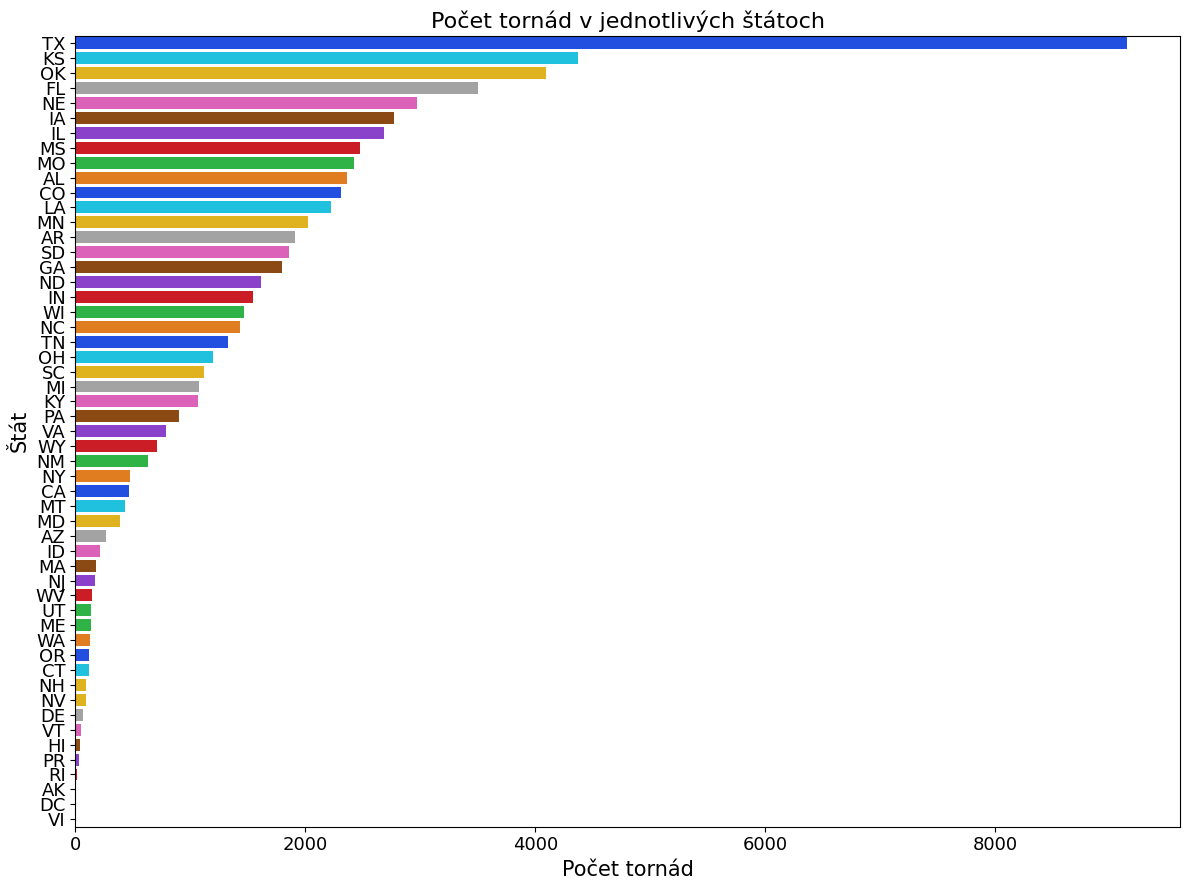

In [25]:
# Spočítanie počtu tornád pre každý štát
tornado_counts = tornado['st'].value_counts()

# Zoradenie štátov podľa počtu tornád
sorted_tornado_counts = tornado_counts.sort_values(ascending=False)

# Vytvorenie grafu
plt.figure(figsize=(12, 9))
sns.barplot(x=sorted_tornado_counts.values, y=sorted_tornado_counts.index, palette='bright', legend=False, hue=sorted_tornado_counts)
plt.xlabel('Počet tornád', fontsize=15)
plt.ylabel('Štát', fontsize=15)
plt.title('Počet tornád v jednotlivých štátoch', fontsize=16)
plt.xticks(fontsize=13)  # Zmena veľkosti písma na osi x
plt.yticks(fontsize=13)  # Zmena veľkosti písma na osi y

plt.tight_layout()
plt.show()


<h4>Zobrazenie počtu tornád na mape USA</h4>

In [26]:
# Získanie súhrnných údajov o tornádach pre jednotlivé štáty(počet tornád v štáte)
states = tornado['st'].value_counts().reset_index()
states.columns = ['st', 'tornado_count']

# Vytvorenie choropleth mapy
fig = px.choropleth(states, 
                    locations="st", 
                    locationmode="USA-states", 
                    scope="usa",
                    color='tornado_count',
                    labels={'tornado_count': 'Počet tornád'},
                    color_continuous_scale='YlOrBr')

# Nastavenie layoutu
fig.update_layout(title="Počet tornád v štátoch 1950-2021")
fig.show()
fig.write_image('mapa_pocet_tornad.png')

<h4>Počet tornád v jednotlivých mesiacoch</h4>

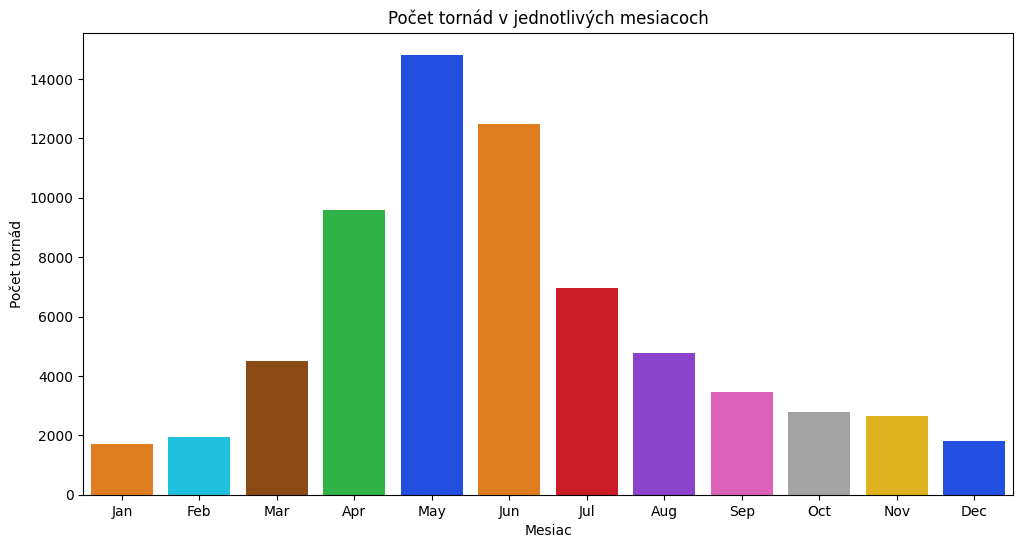

In [27]:
# Preformatovanie atributu mesiac 
tornado['mo'] = tornado['mo'].apply(lambda x: month_abbr[x] if not pd.isnull(x) else '')

# Spocitanie počtu tornád v jednotlivých mesiacoch
monthly_counts = tornado['mo'].value_counts().reset_index()
monthly_counts.columns = ['mesiac', 'pocet']

# Definovanie poradia mesiacov
month_order = list(month_abbr)[1:]

# Vytvorenie stĺpcového grafu pre počet tornád v jednotlivých mesiacoch
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts['mesiac'], y=monthly_counts['pocet'], order=month_order, palette="bright", legend=False, hue=monthly_counts['mesiac'])

# Nastavenie osí a názvu
plt.xlabel('Mesiac')
plt.ylabel('Počet tornád')
plt.title('Počet tornád v jednotlivých mesiacoch')

# Zobrazenie grafu
plt.show()

<h4>Vývoj tornád počas rokov 1950-2021</h4>

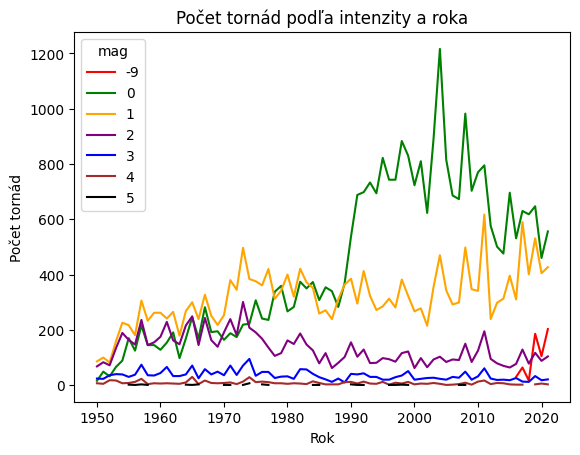

In [28]:
# Nastavenie farieb pre jednotlivé intenzity
intensity_colors = {-9: 'black', 0: 'blue', 1: 'green', 2: 'orange', 3: 'red', 4: 'purple', 5: 'brown'}

# Vytvorenie grafu
ax = tornado.groupby(["yr", "mag"]).size().unstack().plot.line(color=[intensity_colors[col] for col in tornado['mag'].unique()])

# Nastavenie názvu osí a grafu
ax.set_xlabel("Rok")
ax.set_ylabel("Počet tornád")
ax.set_title("Počet tornád podľa intenzity a roka")

# Zobrazenie grafu
plt.show()

<h4>Chi kvadrat test</h4>

In [29]:
# Zoznam atribútov 
other_attributes = ['mo', 'st'] 

# Cyklus pre chi kvadrat test 
for attribute in other_attributes:
    # Vytvorenie kontingenčnej tabuľky pre vybraný atribút a intenzitu tornáda
    contingency_table = pd.crosstab(tornado['mag'], tornado[attribute])
    # Vykonanie chi-kvadrát testu nezávislosti
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Výpis výsledkov testu
    print(f"Chi-kvadrat test medzi intenzitou a {attribute}:")
    print("Hodnota chi-kvadrát štatistiky:", chi2_statistic)
    print("Hodnota p:", p_value)
    if p_value < 0.05:
        print(f"Hodnota p je menšia než 0,05. Existuje významný vzťah medzi intenzitou a {attribute}")
    else:
        print(f"Hodnota p je väčšia alebo rovná 0,05. Neexistuje významný vzťah medzi intenzitou a {attribute}")
    print("\n")

Chi-kvadrat test medzi intenzitou a mo:
Hodnota chi-kvadrát štatistiky: 2683.6722611834693
Hodnota p: 0.0
Hodnota p je menšia než 0,05. Existuje významný vzťah medzi intenzitou a mo


Chi-kvadrat test medzi intenzitou a st:
Hodnota chi-kvadrát štatistiky: 5548.613404621226
Hodnota p: 0.0
Hodnota p je menšia než 0,05. Existuje významný vzťah medzi intenzitou a st




<h4>Boxploty pre dĺžku a šírku tornáda</h4>

Pre dlžku
count    67558.000000
mean         3.478340
std          8.278775
min          0.000000
25%          0.100000
50%          0.800000
75%          3.130000
max        234.700000
Name: len, dtype: float64
Pre šírku
count    67558.000000
mean       106.577030
std        205.802676
min          0.000000
25%         20.000000
50%         50.000000
75%        100.000000
max       4576.000000
Name: wid, dtype: float64


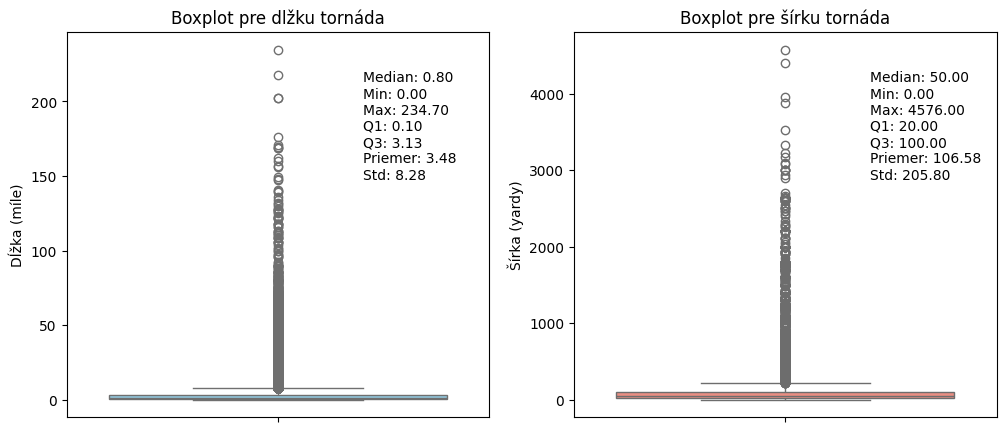

In [30]:
# Vytvorenie dvoch boxplotov pre stĺpce "len" a "wid"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot pre stĺpec "len"
sns.boxplot(ax=axes[0], data=tornado['len'], color='skyblue')
axes[0].set_title('Boxplot pre dlžku tornáda')
axes[0].set_ylabel('Dĺžka (míle)')  # Pridanie označenia osi Y

# Výpočet štatistík pre stĺpec "len"
stats_len = tornado['len'].describe()
print("Pre dlžku")
print(stats_len)

# Zobrazenie štatistík v boxplete pre stĺpec "len"
axes[0].text(0.7, 0.9, f"Median: {stats_len['50%']:.2f}\nMin: {stats_len['min']:.2f}\nMax: {stats_len['max']:.2f}\nQ1: {stats_len['25%']:.2f}\nQ3: {stats_len['75%']:.2f}\nPriemer: {stats_len['mean']:.2f}\nStd: {stats_len['std']:.2f}",
             horizontalalignment='left', verticalalignment='top', transform=axes[0].transAxes, fontsize=10)

# Boxplot pre stĺpec "wid"
sns.boxplot(ax=axes[1], data=tornado['wid'], color='salmon')
axes[1].set_title('Boxplot pre šírku tornáda')
axes[1].set_ylabel('Šírka (yardy)')  # Pridanie označenia osi Y

# Výpočet štatistík pre stĺpec "wid"
stats_wid = tornado['wid'].describe()
print("Pre šírku")
print(stats_wid)

# Zobrazenie štatistík v boxplete pre stĺpec "wid"
axes[1].text(0.7, 0.9, f"Median: {stats_wid['50%']:.2f}\nMin: {stats_wid['min']:.2f}\nMax: {stats_wid['max']:.2f}\nQ1: {stats_wid['25%']:.2f}\nQ3: {stats_wid['75%']:.2f}\nPriemer: {stats_wid['mean']:.2f}\nStd: {stats_wid['std']:.2f}",
             horizontalalignment='left', verticalalignment='top', transform=axes[1].transAxes, fontsize=10)

# Zobrazenie grafu
plt.show()

<h4>3D vizualizácia veľkosti tornád</h4>

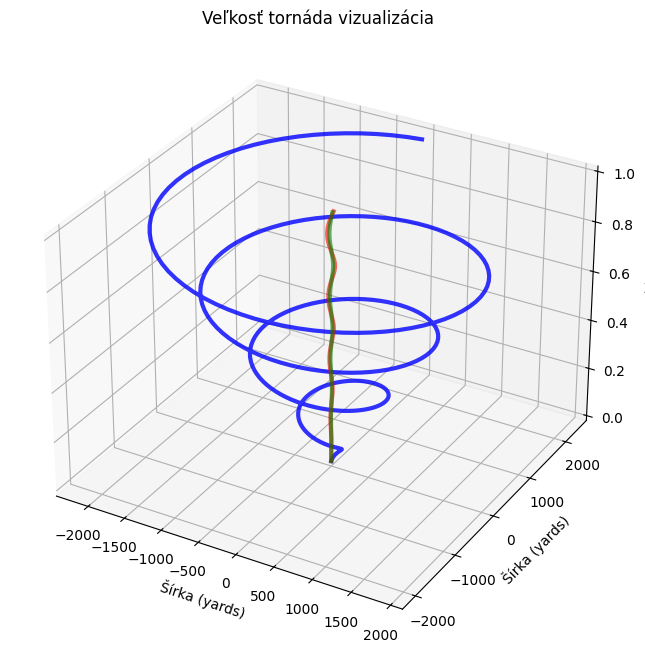

In [31]:
# Získanie maximálnej, priemernej a mediánovej hodnoty zo stĺpca 'wid'
max_wid = tornado['wid'].max()
avg_wid = tornado['wid'].mean()
median_wid = tornado['wid'].median()

# Vytvorenie údajov pre 3D tornado s nahradením hodnôt r maximálnou hodnotou atribútu širka
r = np.linspace(0, max_wid/2, 300) 
theta = np.linspace(-4 * np.pi, 4 * np.pi, 300)
z = np.linspace(0, 1, 300)
x = r * np.sin(theta)
y = r * np.cos(theta)

# Vytvorenie trojrozmerného grafu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vykreslenie tornáda pre maximálnu šírku
ax.plot(x, y, z, color='blue', alpha=0.8, linewidth=3)

# Vytvorenie údajov pre 3D tornado s priemernou šírkou
r_avg = np.linspace(0, avg_wid/2, 300)
x_avg = r_avg * np.sin(theta)
y_avg = r_avg * np.cos(theta)

# Vykreslenie tornáda s priemernou šírkou
ax.plot(x_avg, y_avg, z, color='red', alpha=0.6, linewidth=3)

# Vytvorenie údajov pre 3D tornado s mediánovou šírkou
r_median = np.linspace(0, median_wid/2, 300)
x_median = r_median * np.sin(theta)
y_median = r_median * np.cos(theta)

# Vykreslenie tornáda s mediánovou šírkou
ax.plot(x_median, y_median, z, color='green', alpha=0.6, linewidth=3)

# Nastavenie osí a názvu
ax.set_xlabel('Šírka (yards)')  # Označenie osi X
ax.set_ylabel('Šírka (yards)')  # Označenie osi Y
ax.set_zlabel('Z')  # Označenie osi Z
ax.set_title('Veľkosť tornáda vizualizácia')  # Názov grafu

# Zobrazenie grafu
plt.show()

<h4>Vizualizácia širky tornád</h4>

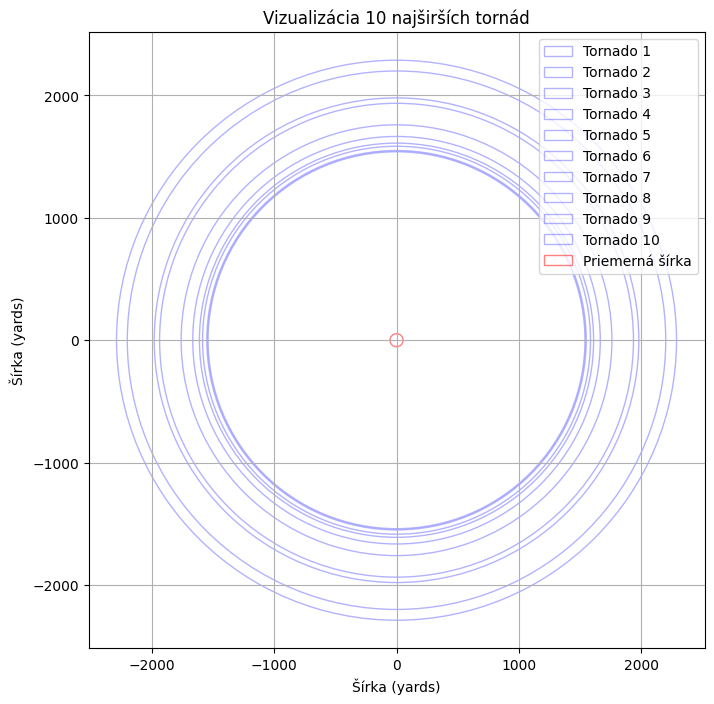

In [32]:
# Získanie priemeru a 10 najväčších hodnôt zo stĺpca 'wid'
mean_wid = tornado['wid'].mean()
top_10_max_wid = tornado['wid'].nlargest(10)

# Vytvorenie prostredia pre grafy
fig, ax = plt.subplots(figsize=(10, 8))

# Vykreslenie kruhu pre priemernú šírku tornáda
circle_mean = plt.Circle((0, 0), mean_wid/2, color='red', alpha=0.5, fill=False, label='Priemerná šírka')

# Vykreslenie kruhov pre 10 najväčších tornád
for i, wid in enumerate(top_10_max_wid):
    circle = plt.Circle((0, 0), wid/2, color='blue', alpha=0.3, fill=False, label=f'Tornado {i+1}')
    ax.add_artist(circle)

# Pridanie kruhov do grafu
ax.add_artist(circle_mean)

# Nastavenie škály grafu
max_wid = top_10_max_wid.max()
ax.set_xlim(-max_wid/2 * 1.1, max_wid/2 * 1.1)
ax.set_ylim(-max_wid/2 * 1.1, max_wid/2 * 1.1)

# Označenie osí
ax.set_xlabel('Šírka (yards)')
ax.set_ylabel('Šírka (yards)')

# Názov grafu
ax.set_title('Vizualizácia 10 najširších tornád')

# Pridanie legendy s umiestnením v pravom hornom rohu
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Zobrazenie grafu
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

<h4>Korelačná matica</h4>

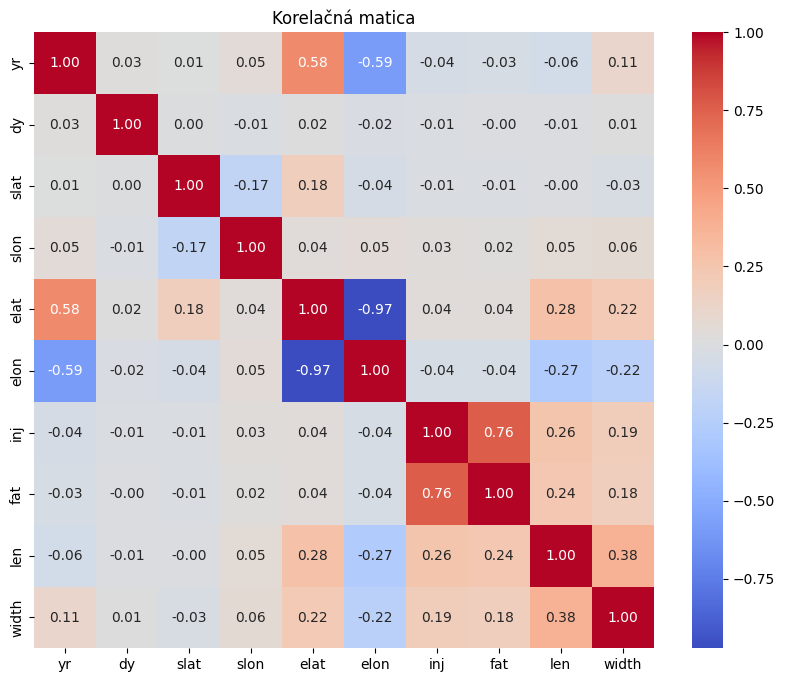

Zatriedenie sily korelácií:
yr a dy: Slabá korelácia (0.03)
yr a slat: Slabá korelácia (0.01)
yr a slon: Slabá korelácia (0.05)
yr a elat: Stredná korelácia (0.58)
yr a elon: Stredná korelácia (0.59)
yr a inj: Slabá korelácia (0.04)
yr a fat: Slabá korelácia (0.03)
yr a len: Slabá korelácia (0.06)
yr a width: Slabá korelácia (0.11)
dy a slat: Slabá korelácia (0.00)
dy a slon: Slabá korelácia (0.01)
dy a elat: Slabá korelácia (0.02)
dy a elon: Slabá korelácia (0.02)
dy a inj: Slabá korelácia (0.01)
dy a fat: Slabá korelácia (0.00)
dy a len: Slabá korelácia (0.01)
dy a width: Slabá korelácia (0.01)
slat a slon: Slabá korelácia (0.17)
slat a elat: Slabá korelácia (0.18)
slat a elon: Slabá korelácia (0.04)
slat a inj: Slabá korelácia (0.01)
slat a fat: Slabá korelácia (0.01)
slat a len: Slabá korelácia (0.00)
slat a width: Slabá korelácia (0.03)
slon a elat: Slabá korelácia (0.04)
slon a elon: Slabá korelácia (0.05)
slon a inj: Slabá korelácia (0.03)
slon a fat: Slabá korelácia (0.02)
slon

In [33]:
# Vyber numerických atribútov
data = {
    'yr': tornado['yr'],
    'dy': tornado['dy'],
    'slat': tornado['slat'],
    'slon': tornado['slon'],
    'elat': tornado['elat'],
    'elon': tornado['elon'],
    'inj': tornado['inj'],
    'fat': tornado['fat'],
    'len': tornado['len'],
    'width': tornado['wid']
}

# Vytvorenie dataframu s vybranými atribútmi
df = pd.DataFrame(data)

# Výpočet korelačnej matice
correlation_matrix = df.corr()

# Vytvorenie grafu
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelačná matica')
plt.show()

# Zobrazenie hodnoty korelácie pre jednotlivé dvojice
print("Zatriedenie sily korelácií:")
for i, column1 in enumerate(df.columns):
    for j, column2 in enumerate(df.columns):
        if i < j:  
            correlation_strength = abs(correlation_matrix[column1][column2])
            if correlation_strength > 0.8:
                category = "Silná"
            elif correlation_strength >= 0.5:
                category = "Stredná"
            else:
                category = "Slabá"
            print(f"{column1} a {column2}: {category} korelácia ({correlation_strength:.2f})")


<h4>Závislosť medzi šírkou a dĺžkou tornáda</h4>

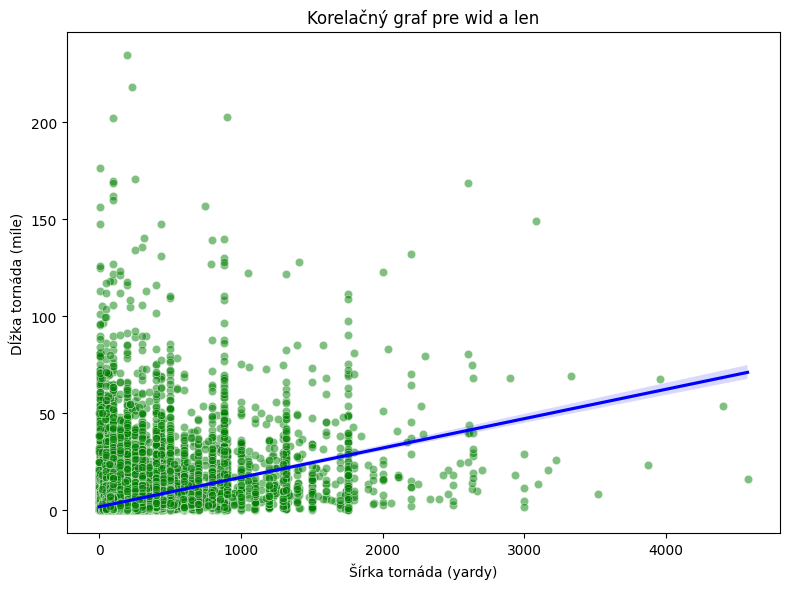

In [34]:
# Vytvorenie grafu
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot pre šírku a dĺžku tornáda s lineárnou regresiou
sns.scatterplot(x=tornado['wid'], y=tornado['len'], color='green', alpha=0.5, ax=ax)
sns.regplot(x=tornado['wid'], y=tornado['len'], scatter=False, color='blue', ax=ax)

# Nastavenie názvu a osí
ax.set_title('Korelačný graf pre wid a len')
ax.set_xlabel('Šírka tornáda (yardy)')
ax.set_ylabel('Dĺžka tornáda (míle)')

# Zobrazenie grafu
plt.tight_layout()
plt.show()

<h4>Zobrazenie počtu obetí a intenzity tornáda</h4>

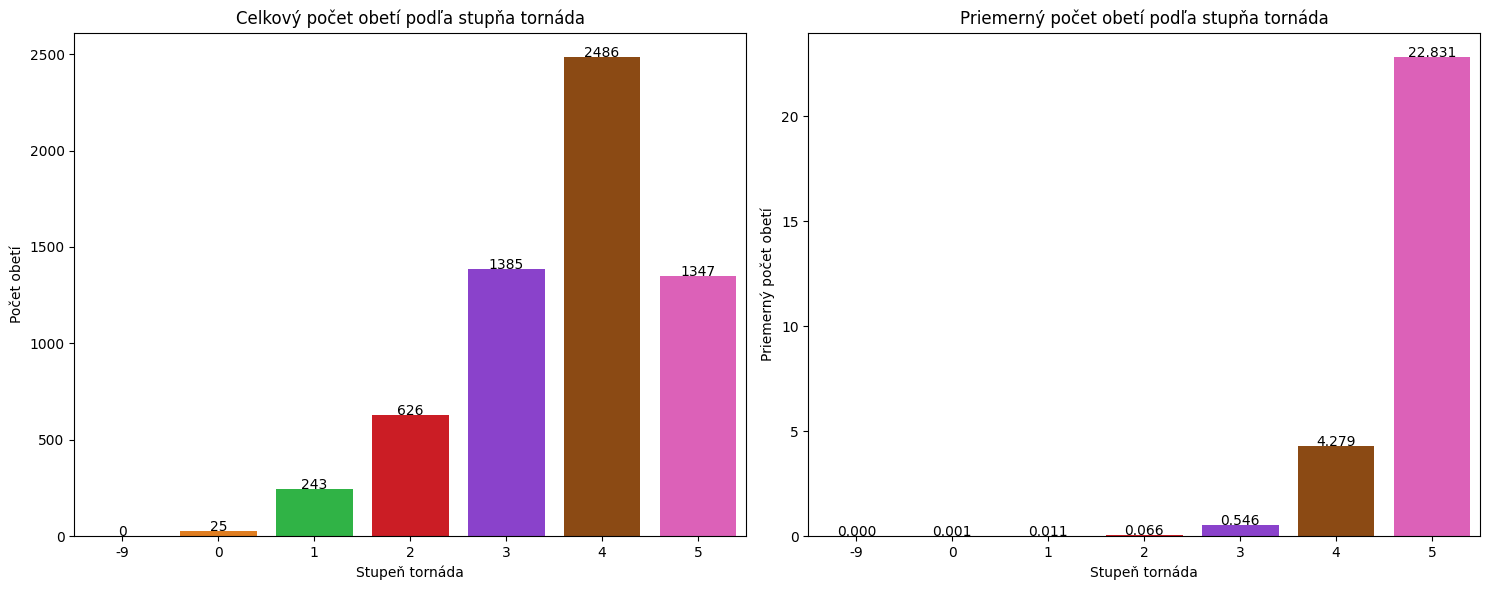

In [35]:
# Spočítanie počtu obetí a priemeru pre každý stupeň tornáda
summary = tornado.groupby('mag')['fat'].agg(['sum', 'mean']).reset_index()

# Vytvorenie barplot grafu 
plt.figure(figsize=(15, 6))

# Graf pre počet obetí
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x='mag', y='sum', data=summary, palette='bright', hue='mag', legend=False)
plt.title('Celkový počet obetí podľa stupňa tornáda')
plt.xlabel('Stupeň tornáda')
plt.ylabel('Počet obetí')

# Pridanie čísel nad každým stĺpcom
for index, row in summary.iterrows():
    barplot1.text(row.name, row['sum'], "{:.0f}".format(row['sum']), color='black', ha="center")

# Graf s priemerným počtom obetí
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x='mag', y='mean', data=summary, palette='bright', hue='mag', legend=False)
plt.title('Priemerný počet obetí podľa stupňa tornáda')
plt.xlabel('Stupeň tornáda')
plt.ylabel('Priemerný počet obetí')

# Pridanie čísel nad každým stĺpcom
for index, row in summary.iterrows():
    barplot2.text(row.name, row['mean'], "{:.3f}".format(row['mean']), color='black', ha="center")

plt.tight_layout()
plt.show()

<h4>Zobrazenie počtu úmrtí podľa štátov</h4>

In [36]:
# Získanie súhrnných údajov o počte obetí pre jednotlivé štáty
state_fatalities = tornado.groupby('st')['fat'].sum().reset_index()

# Vytvorenie heatmapy pre počet obetí v jednotlivých štátoch
fig = px.choropleth(state_fatalities,
                    locations='st',
                    locationmode='USA-states',
                    scope='usa',
                    color='fat',
                    color_continuous_scale='YlOrBr',
                    labels={'fat': 'Úmrtia'},
                    title='Počet úmrtí v štátoch 1950-2021')

# Nastavenie layoutu
fig.update_layout(
    geo=dict(bgcolor='white', showcountries=True, countrycolor='black'),
    width=1200,
    height=800
)
fig.show()
# Uloženie mapy do súboru
fig.write_image('mapa_umrti_tornada.png')

<h4>Zobrazenie trasy tornád pre 50 najdlhších tornád</h4>

In [37]:
# Získanie 50 najdlhších tornád
top_50_tornadoes = tornado.sort_values(by='len', ascending=False).head(50)

# Vytvorenie prázdnej mapy so štátmi USA
fig = go.Figure()

# Pridanie čiar medzi začiatkom a koncom tornád pre 50 najdlhších tornád
for index, row in top_50_tornadoes.iterrows():
    if row['elat'] != 0 and row['elon'] != 0:
        # Nastavenie farby pre začiatok a koniec
        start_color = 'green'
        end_color = 'red'
        
        # Pridanie bodov pre začiatok a koniec
        fig.add_trace(
            go.Scattergeo(
                locationmode='USA-states',
                lon=[row['slon'], row['elon']],
                lat=[row['slat'], row['elat']],
                mode='markers',
                marker=dict(size=6, color=[start_color, end_color]),
                showlegend=False
            )
        )
        
        # Pridanie čiar medzi bodmi 
        fig.add_trace(
            go.Scattergeo(
                locationmode='USA-states',
                lon=[row['slon'], row['elon']],
                lat=[row['slat'], row['elat']],
                mode='lines',
                line=dict(width=3, color=end_color),  # Nastavi farbu začiatku
                opacity=0.5,
                showlegend=False
            )
        )

# Nastavenie layoutu s bielym pozadím, scope na štáty USA, nastavenie farby hraníc a farby pozadia
fig.update_layout(
    title="50 najdlhších tornád a ich trasy",
    geo=dict(bgcolor='white', scope='usa', showcountries=True, countrycolor='black', showsubunits=True, subunitcolor='black'),
    showlegend=False,
    width=1200,  # Šírka mapy
    height=800
)
fig.show()
# Uloženie mapy do súboru
fig.write_image('mapa_trasy_tornad.png')